In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
ratings = pd.read_csv("datasets/ml-latest/ratings.csv", usecols=['movieId', 'rating'])

In [4]:
genome_scores = pd.read_csv("datasets/ml-latest/genome-scores.csv")

In [5]:
genome_tags = pd.read_csv("datasets/ml-latest/genome-tags.csv")

In [6]:
movie_names = pd.read_csv("datasets/ml-latest/movies.csv")

### Determine a good relevancy score cut-off

In [7]:
%matplotlib inline

In [8]:
genome_scores.head()

,movieId,tagId,relevance
0,1,1,0.02400
1,1,2,0.02400
2,1,3,0.05475
3,1,4,0.09200
4,1,5,0.14825


In [9]:
genome_scores[:100000].pivot(index='movieId', columns='tagId')['relevance']

tagId,1,2,3,4,5,6,7,8,9,10,...,1119,1120,1121,1122,1123,1124,1125,1126,1127,1128
movieId,,,,,,,,,,,,,,,,,,,,,
1,0.02400,0.02400,0.05475,0.09200,0.14825,0.21500,0.06625,0.27025,0.26050,0.03025,...,0.03650,0.01800,0.04525,0.03275,0.12450,0.04175,0.02000,0.03475,0.08350,0.02525
2,0.03800,0.04175,0.03700,0.04875,0.11075,0.07325,0.04950,0.10775,0.10200,0.02050,...,0.03900,0.01925,0.01725,0.02425,0.13425,0.02225,0.01600,0.01450,0.09600,0.02025
3,0.04200,0.05250,0.02725,0.07975,0.05625,0.07025,0.05975,0.18275,0.05175,0.02725,...,0.03950,0.02625,0.02725,0.03450,0.16925,0.03525,0.01725,0.01875,0.09925,0.02000
4,0.03600,0.03850,0.03500,0.03125,0.07100,0.04500,0.02475,0.08300,0.05150,0.02975,...,0.05375,0.03300,0.02275,0.04025,0.19600,0.05700,0.01550,0.01475,0.06625,0.01400
5,0.04075,0.05125,0.05800,0.03675,0.07575,0.12675,0.02975,0.08175,0.03075,0.02950,...,0.04000,0.02850,0.02100,0.02650,0.15475,0.02050,0.01700,0.01575,0.11275,0.01975
6,0.02725,0.02425,0.01825,0.04500,0.09925,0.06350,0.04300,0.24375,0.13200,0.02375,...,0.04400,0.01775,0.02200,0.06000,0.29050,0.15200,0.03675,0.01925,0.06850,0.02050
7,0.04350,0.04950,0.16800,0.08050,0.11700,0.15575,0.05300,0.11075,0.03950,0.08350,...,0.03575,0.02800,0.01225,0.03550,0.13775,0.04625,0.02000,0.01050,0.11425,0.02000
8,0.02950,0.03425,0.04400,0.02225,0.05725,0.03825,0.01750,0.07375,0.03175,0.04000,...,0.03525,0.01925,0.01650,0.02300,0.22375,0.02750,0.01725,0.01100,0.07425,0.01650
9,0.03400,0.03900,0.01775,0.01850,0.03875,0.01925,0.01350,0.04275,0.01775,0.01475,...,0.02150,0.01100,0.01175,0.01575,0.15375,0.02175,0.01150,0.00700,0.07675,0.01675


In [10]:
table = genome_scores[:100000].pivot_table('relevance', index='movieId', columns='tagId', aggfunc='mean')

In [11]:
table.head()

tagId,1,2,3,4,5,6,7,8,9,10,...,1119,1120,1121,1122,1123,1124,1125,1126,1127,1128
movieId,,,,,,,,,,,,,,,,,,,,,
1,0.02400,0.02400,0.05475,0.09200,0.14825,0.21500,0.06625,0.27025,0.26050,0.03025,...,0.03650,0.01800,0.04525,0.03275,0.12450,0.04175,0.02000,0.03475,0.08350,0.02525
2,0.03800,0.04175,0.03700,0.04875,0.11075,0.07325,0.04950,0.10775,0.10200,0.02050,...,0.03900,0.01925,0.01725,0.02425,0.13425,0.02225,0.01600,0.01450,0.09600,0.02025
3,0.04200,0.05250,0.02725,0.07975,0.05625,0.07025,0.05975,0.18275,0.05175,0.02725,...,0.03950,0.02625,0.02725,0.03450,0.16925,0.03525,0.01725,0.01875,0.09925,0.02000
4,0.03600,0.03850,0.03500,0.03125,0.07100,0.04500,0.02475,0.08300,0.05150,0.02975,...,0.05375,0.03300,0.02275,0.04025,0.19600,0.05700,0.01550,0.01475,0.06625,0.01400
5,0.04075,0.05125,0.05800,0.03675,0.07575,0.12675,0.02975,0.08175,0.03075,0.02950,...,0.04000,0.02850,0.02100,0.02650,0.15475,0.02050,0.01700,0.01575,0.11275,0.01975


In [12]:
%matplotlib inline

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10f41ccc0>]], dtype=object)

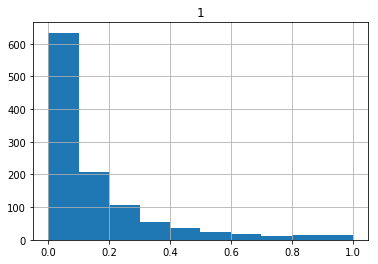

In [13]:
table[:1].T.hist()

conclusion: 0.3 seems to be a good cut-off

In [14]:
movie_tags = genome_scores[genome_scores.relevance > 0.3][['movieId', 'tagId']]

### Merge in tag and movie names

In [15]:
tags_to_movies = pd.merge(movie_tags, genome_tags, on='tagId', how='left')[['movieId', 'tagId']]

In [16]:
tags_to_movies['tagId'] = tags_to_movies.tagId.astype(str)

In [17]:
tags_per_movie = tags_to_movies.groupby('movieId').agg({'tagId': lambda x: ' '.join(set(x))}).reset_index(level=1)

In [18]:
avg_ratings = ratings.groupby('movieId').agg({'rating': ['median', 'mean']})['rating'].reset_index(level=1)

In [19]:
movies_with_ratings = pd.merge(movie_names, avg_ratings, on='movieId')

In [20]:
dataset = pd.merge(movies_with_ratings, tags_per_movie, on='movieId')

In [21]:
dataset.rename(columns={'median': 'rating_median', 'mean': 'rating_mean', 'tagId': 'movie_tags'}, inplace=True)

### Extracting movie year from title

In [22]:
import re

def extract_year_from_movie_title(movie_title):
    matches = re.findall(r'\d{4}', movie_title)
    if len(matches) > 1:
        return int(matches[-1])
    if len(matches) < 1:
        return np.nan
    return int(matches[0])

In [23]:
dataset['year'] = dataset.title.apply(extract_year_from_movie_title)

In [24]:
dataset.head()

,movieId,title,genres,rating_median,rating_mean,movie_tags,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.0,3.889300,62 1114 304 971 867 669 969 777 548 610 277 23...,1995.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.0,3.229527,62 304 20 971 867 777 469 662 378 279 1077 415...,1995.0
2,3,Grumpier Old Men (1995),Comedy|Romance,3.0,3.178142,128 451 726 195 292 971 867 902 403 777 277 46...,1995.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,3.0,2.879433,128 387 726 971 107 1101 445 864 277 22 100 29...,1995.0
4,5,Father of the Bride Part II (1995),Comedy,3.0,3.080410,450 387 451 726 195 971 314 867 902 445 777 86...,1995.0


### Bag of words vectorization

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [26]:
from sklearn.metrics.pairwise import cosine_similarity

In [27]:
bag_of_words = CountVectorizer()

In [28]:
tags_as_descriptors = [' '.join(genome_tags.tagId.astype(str))]

In [88]:
movies_described_bag_of_words = bag_of_words.fit_transform(dataset.movie_tags)

In [90]:
df_bag_m2m = pd.DataFrame(cosine_similarity(movies_described_bag_of_words))

### Tf-Idf Vectorization

In [145]:
tf_idf = TfidfVectorizer()

In [146]:
movies_tf_idf_described = tf_idf.fit_transform(dataset.movie_tags)

In [147]:
df_tfidf_m2m = pd.DataFrame(cosine_similarity(movies_tf_idf_described))

In [148]:
df_tfidf_m2m.head()

,0,1,2,3,4,5,6,7,8,9,...,10664,10665,10666,10667,10668,10669,10670,10671,10672,10673
0,1.000000,0.431993,0.159781,0.141310,0.216984,0.256402,0.219518,0.255039,0.084687,0.251235,...,0.253995,0.245707,0.298894,0.218980,0.243204,0.228843,0.338929,0.390264,0.527402,0.210074
1,0.431993,1.000000,0.107847,0.120763,0.237059,0.120485,0.181958,0.282949,0.188213,0.234384,...,0.365564,0.130227,0.221158,0.171833,0.172612,0.160411,0.251052,0.265634,0.299784,0.181168
2,0.159781,0.107847,1.000000,0.260063,0.430876,0.118901,0.369714,0.206708,0.067116,0.175896,...,0.151341,0.135469,0.134628,0.093538,0.102329,0.123552,0.142192,0.124184,0.133702,0.096047
3,0.141310,0.120763,0.260063,1.000000,0.263465,0.088910,0.374638,0.244020,0.077906,0.075830,...,0.144143,0.136691,0.119444,0.108307,0.110534,0.113956,0.159768,0.165774,0.165368,0.079979
4,0.216984,0.237059,0.430876,0.263465,1.000000,0.050463,0.446251,0.182284,0.108008,0.137105,...,0.180975,0.204900,0.114578,0.107630,0.137742,0.105655,0.173343,0.187519,0.182170,0.098338


### Match indices to movie IDs

In [158]:
index_to_movie_id = dataset['movieId']

In [161]:
index_to_movie_id[0]

1

In [163]:
index_to_movie_id[10665]

160980

In [164]:
df_tfidf_m2m.columns = [str(index_to_movie_id[int(col)]) for col in df_tfidf_m2m.columns]

In [172]:
df_tfidf_m2m.index = map(lambda x: index_to_movie_id[x], df_tfidf_m2m.index)

In [189]:
df_tfidf_m2m.head()

,1,2,3,4,5,6,7,8,9,10,...,160954,160980,161131,161354,161582,161634,162350,162376,162578,162600
1,1.000000,0.431993,0.159781,0.141310,0.216984,0.256402,0.219518,0.255039,0.084687,0.251235,...,0.253995,0.245707,0.298894,0.218980,0.243204,0.228843,0.338929,0.390264,0.527402,0.210074
2,0.431993,1.000000,0.107847,0.120763,0.237059,0.120485,0.181958,0.282949,0.188213,0.234384,...,0.365564,0.130227,0.221158,0.171833,0.172612,0.160411,0.251052,0.265634,0.299784,0.181168
3,0.159781,0.107847,1.000000,0.260063,0.430876,0.118901,0.369714,0.206708,0.067116,0.175896,...,0.151341,0.135469,0.134628,0.093538,0.102329,0.123552,0.142192,0.124184,0.133702,0.096047
4,0.141310,0.120763,0.260063,1.000000,0.263465,0.088910,0.374638,0.244020,0.077906,0.075830,...,0.144143,0.136691,0.119444,0.108307,0.110534,0.113956,0.159768,0.165774,0.165368,0.079979
5,0.216984,0.237059,0.430876,0.263465,1.000000,0.050463,0.446251,0.182284,0.108008,0.137105,...,0.180975,0.204900,0.114578,0.107630,0.137742,0.105655,0.173343,0.187519,0.182170,0.098338


In [176]:
df_tfidf_m2m.tail()

,1,2,3,4,5,6,7,8,9,10,...,160954,160980,161131,161354,161582,161634,162350,162376,162578,162600
161634,0.228843,0.160411,0.123552,0.113956,0.105655,0.384652,0.118860,0.114861,0.092883,0.189042,...,0.185566,0.168822,0.256561,0.194614,0.274796,1.000000,0.258832,0.450956,0.319277,0.097457
162350,0.338929,0.251052,0.142192,0.159768,0.173343,0.355809,0.191053,0.226337,0.164536,0.232459,...,0.275451,0.195042,0.404297,0.320394,0.381101,0.258832,1.000000,0.367129,0.316950,0.253319
162376,0.390264,0.265634,0.124184,0.165774,0.187519,0.451733,0.160788,0.161037,0.083897,0.196478,...,0.269517,0.265497,0.398473,0.213949,0.455381,0.450956,0.367129,1.000000,0.555852,0.204455
162578,0.527402,0.299784,0.133702,0.165368,0.182170,0.340640,0.183740,0.229345,0.099949,0.177231,...,0.222804,0.279660,0.314855,0.246288,0.333284,0.319277,0.316950,0.555852,1.000000,0.209276
162600,0.210074,0.181168,0.096047,0.079979,0.098338,0.069668,0.069561,0.117470,0.121824,0.128960,...,0.208857,0.116181,0.166620,0.222607,0.126180,0.097457,0.253319,0.204455,0.209276,1.000000


### Check similarities

In [177]:
df_tfidf_m2m.ix[1].sort_values(ascending=False)

1         1.000000
3114      0.736535
4886      0.724898
78499     0.720759
2355      0.714265
76093     0.686358
5218      0.672731
68954     0.648925
6377      0.647981
4306      0.641639
50872     0.635019
8961      0.626673
2761      0.608781
81847     0.604853
45517     0.602484
152081    0.601611
42191     0.599953
97913     0.594801
98491     0.591688
108932    0.590483
63859     0.584796
134853    0.580557
137857    0.578557
72356     0.576534
79091     0.575996
120474    0.574247
103141    0.572067
364       0.570269
2294      0.567684
112175    0.566197
            ...   
5771      0.036133
3722      0.036094
5583      0.035392
2776      0.035207
43904     0.034899
1002      0.034784
4854      0.033972
2234      0.033359
3924      0.032970
166       0.032479
84696     0.032053
3938      0.031790
787       0.031660
1384      0.031533
6248      0.031310
8196      0.031309
5228      0.031144
1718      0.030868
4838      0.029701
77414     0.029263
33585     0.028776
5998      0.

In [183]:
dataset[dataset.movieId == 1]

,movieId,title,genres,rating_median,rating_mean,movie_tags,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.0,3.8893,62 1114 304 971 867 669 969 777 548 610 277 23...,1995.0


In [182]:
dataset[dataset.movieId == 3114]

,movieId,title,genres,rating_median,rating_mean,movie_tags,year
2769,3114,Toy Story 2 (1999),Adventure|Animation|Children|Comedy|Fantasy,4.0,3.820844,62 1114 304 971 867 669 969 777 277 235 469 39...,1999.0


In [181]:
dataset[dataset.movieId == 4886]

,movieId,title,genres,rating_median,rating_mean,movie_tags,year
4331,4886,"Monsters, Inc. (2001)",Adventure|Animation|Children|Comedy|Fantasy,4.0,3.863633,62 1114 899 971 867 669 969 777 548 610 122 27...,2001.0


In [180]:
dataset[dataset.movieId == 78499]

,movieId,title,genres,rating_median,rating_mean,movie_tags,year
9070,78499,Toy Story 3 (2010),Adventure|Animation|Children|Comedy|Fantasy|IMAX,4.0,3.910244,62 1114 304 899 971 867 777 548 610 122 277 23...,2010.0


## The closest movies to Toy Story 1 are the sequels and Monsters Inc! (No sh*t sherlock)